<a href="https://colab.research.google.com/github/emmab2022/Phddataset/blob/main/MLPhDModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PHD ML Model v 1**


# **Load Data**

In [7]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/emmab2022/Phddataset/main/v16Final%20PHD%20Data%20Set.csv')
df

,TYPE,GENERATION,GENDER,AGE,ETHNICITY,PELL,ATTENDANCE,ENTRY GPA,GRADUATED
0,2,2,2,1,5,1,1,3,1
1,2,1,2,1,5,1,1,3,1
2,2,2,2,1,2,1,1,3,1
3,2,2,2,1,5,1,1,3,1
4,2,2,2,1,2,1,1,3,1
...,...,...,...,...,...,...,...,...,...
9994,2,1,1,4,5,2,1,4,2
9995,2,1,1,4,2,2,1,4,2
9996,2,1,2,4,2,1,2,3,2
9997,2,2,2,4,1,1,2,3,2


# **Data Preparation**


## Data Separation as X and Y

In [8]:
y = df['GRADUATED']
y

0       1
1       1
2       1
3       1
4       1
       ..
9994    2
9995    2
9996    2
9997    2
9998    2
Name: GRADUATED, Length: 9999, dtype: int64

In [9]:
x = df.drop('GRADUATED', axis=1)
x


,TYPE,GENERATION,GENDER,AGE,ETHNICITY,PELL,ATTENDANCE,ENTRY GPA
0,2,2,2,1,5,1,1,3
1,2,1,2,1,5,1,1,3
2,2,2,2,1,2,1,1,3
3,2,2,2,1,5,1,1,3
4,2,2,2,1,2,1,1,3
...,...,...,...,...,...,...,...,...
9994,2,1,1,4,5,2,1,4
9995,2,1,1,4,2,2,1,4
9996,2,1,2,4,2,1,2,3
9997,2,2,2,4,1,1,2,3


## Data Splitting


In [10]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [9]:
x_train

,TYPE,GENERATION,GENDER,AGE,ETHNICITY,PELL,ATTENDANCE,ENTRY GPA
9387,2,2,1,2,2,2,1,1
7538,2,2,2,1,2,1,1,2
6949,2,1,2,1,3,1,1,3
1919,2,1,2,2,2,2,2,3
5712,2,1,1,4,5,2,1,1
...,...,...,...,...,...,...,...,...
350,2,1,2,1,5,1,1,3
79,2,1,1,1,3,1,1,1
8039,2,1,1,1,2,2,1,1
6936,2,1,2,1,2,1,1,3


In [11]:
x_test

,TYPE,GENERATION,GENDER,AGE,ETHNICITY,PELL,ATTENDANCE,ENTRY GPA
9706,2,1,1,3,1,2,1,2
9334,2,1,1,2,5,2,1,1
3854,2,2,2,3,5,1,2,4
2029,2,1,2,2,2,1,2,3
3539,2,2,2,2,5,1,2,4
...,...,...,...,...,...,...,...,...
9609,2,1,1,3,5,2,1,2
1207,2,2,1,1,2,1,1,1
7959,2,1,1,1,2,2,1,1
2339,2,1,1,2,5,1,2,2


# **Model Building**

## **Decision Tree**

### **Training the model**

In [56]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=2, random_state=100)
dtc.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=100)

### **Applying the model to make a prediction**

In [19]:
y_dtc_train_pred = dtc.predict(x_train)
y_dtc_test_pred = dtc.predict(x_test)

In [20]:
y_dtc_train_pred

array([2, 1, 1, ..., 2, 2, 1])

In [21]:
y_dtc_test_pred

array([1, 2, 1, ..., 2, 1, 2])

### **Evaluate model performance**

In [22]:
y_train

9387    2
7538    2
6949    2
1919    1
5712    1
       ..
350     1
79      1
8039    2
6936    2
5640    1
Name: GRADUATED, Length: 7999, dtype: int64

In [23]:
y_dtc_train_pred

array([2, 1, 1, ..., 2, 2, 1])

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

dtc_train_mse = mean_squared_error(y_train, y_dtc_train_pred)
dtc_train_r2 = r2_score(y_train, y_dtc_train_pred)

dtc_test_mse = mean_squared_error(y_test, y_dtc_test_pred)
dtc_test_r2 = r2_score(y_test, y_dtc_test_pred)

In [31]:
print('DTC MSE (Train): ', dtc_train_mse)
print('DTC R2 (Train): ', dtc_train_r2)
print('DTC MSE (Test): ', dtc_test_mse)
print('DTC R2 (Test): ', dtc_test_r2)

DTC MSE (Train):  0.1646455806975872
DTC R2 (Train):  0.281099310366853
DTC MSE (Test):  0.1755
DTC R2 (Test):  0.23354077956108732


In [42]:
dtc_results = pd.DataFrame(['DecisionTree', dtc_train_mse, dtc_train_r2, dtc_test_mse, dtc_test_r2]).transpose()
dtc_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [44]:
dtc_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,DecisionTree,0.164646,0.281099,0.1755,0.233541


## **Linear Regression**

### **Training the model**

In [46]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### **Applying the model to make a prediction**

In [47]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [48]:
y_lr_train_pred

array([1.64367249, 1.50049385, 1.48625817, ..., 1.84432468, 1.47996211,
       1.18979903])

In [49]:
y_lr_test_pred

array([1.39866947, 1.64503764, 0.8908989 , ..., 1.84432468, 1.17096612,
       1.87170973])

### **Evaluate model performance**

In [50]:
y_train

9387    2
7538    2
6949    2
1919    1
5712    1
       ..
350     1
79      1
8039    2
6936    2
5640    1
Name: GRADUATED, Length: 7999, dtype: int64

In [51]:
y_lr_train_pred

array([1.64367249, 1.50049385, 1.48625817, ..., 1.84432468, 1.47996211,
       1.18979903])

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [53]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  0.14657860551554894
LR R2 (Train):  0.3599860977493132
LR MSE (Test):  0.14708034951196247
LR R2 (Test):  0.3576576066733813


In [54]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [55]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.146579,0.359986,0.14708,0.357658


## **Random Forest**

### **Training the model**

In [57]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)


RandomForestRegressor(max_depth=2, random_state=100)

### **Applying the model to make a prediction**

In [58]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

### **Evaluate model**

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [60]:
print('RF MSE (Train): ', rf_train_mse)
print('RF R2 (Train): ', rf_train_r2)
print('RF MSE (Test): ', rf_test_mse)
print('RF R2 (Test): ', rf_test_r2)

RF MSE (Train):  0.14416648875528526
RF R2 (Train):  0.3705182504805443
RF MSE (Test):  0.14639816707606174
RF R2 (Test):  0.36063689452533354


In [61]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [62]:
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,0.144166,0.370518,0.146398,0.360637


##**Model Comparison**

In [64]:
df_models = pd.concat([dtc_results, lr_results, rf_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,DecisionTree,0.164646,0.281099,0.1755,0.233541
0,Linear regression,0.146579,0.359986,0.14708,0.357658
0,Random forest,0.144166,0.370518,0.146398,0.360637


In [65]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,DecisionTree,0.164646,0.281099,0.1755,0.233541
1,Linear regression,0.146579,0.359986,0.14708,0.357658
2,Random forest,0.144166,0.370518,0.146398,0.360637


## **Data Visualization of Prediction Results**

[]

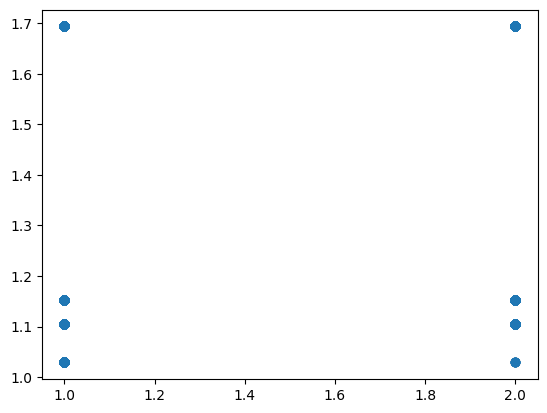

In [68]:
import matplotlib.pyplot as plt
plt.scatter(x=y_train, y=y_rf_train_pred, alpha=0.3)
plt.plot()